In [1]:
source('helpers.R')

In [26]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

In [3]:
cts = c('CD4+ T', 'CD4+ CAR T', 'CD8+ T', 'CD8+ CAR T', 'Cycling CD8+ T')
target <- subset(prepost, cell_type %in% cts) 

In [4]:
target$cluster = 'CD8'
target$cluster[target$cell_type %in% c('CD4+ T', 'CD4+ CAR T')] = 'CD4'

target$group_by_cluster = 'CART' 
target$group_by_cluster[target$cell_type %!in% c('CD4+ CAR T', 'CD8+ CAR T')] = 'Endogenous'

target$sample = paste0(target$sample_id, '_', target$group_by_cluster)

In [6]:
cd8.target = subset(target, cluster == 'CD8')

In [8]:
cd8.target$Day_Type_CAR = paste0(cd8.target$Day, ' CD8+ ', cd8.target$group_by_cluster)
order = c('D0 CD8+ Endogenous','D7 CD8+ Endogenous','D21 CD8+ Endogenous','D7 CD8+ CART','D21 CD8+ CART')
cd8.target$Day_Type_CAR <- factor(cd8.target$Day_Type_CAR, levels = order)
(table(cd8.target$Day_Type_CAR))




 D0 CD8+ Endogenous  D7 CD8+ Endogenous D21 CD8+ Endogenous        D7 CD8+ CART 
               3514                3799                2644               10856 
      D21 CD8+ CART 
               2274 

In [11]:
cd8.target.pb <- AggregateExpression(cd8.target, assays = "RNA", return.seurat = T, group.by = c("Day_Type_CAR", "group_by_cluster", "Patient"))
cd8.target.pb[["RNA"]] <- as(object = cd8.target.pb[["RNA"]], Class = "Assay")

Centering and scaling data matrix

Warning message:
"Assay RNA changing from Assay5 to Assay"


In [25]:
genes = c('CXCR4','TOX2','HLA-DRA','CD38', 'HAVCR2','CTLA4','CXCL13','ENTPD1', 'TOP2A',  'MKI67')
pdf(file.path(panel.path, paste0("2D_CD8_genes_by_day_car.pdf")), width=2.5, height=3)
for (gene in genes) {
p <- FeatureStatPlot(cd8.target.pb, stat.by = c(gene), slot='data', add_point = F, pt.color='black',pt.size=.5, pt.alpha=1,add_trend=F,
                split.by = "Day_Type_CAR", plot_type = "box",  palette='npg',
                comparisons = T, sig_label='p.format')  & ylab('Expression Level') & xlab('') & 
    theme(axis.text.x=element_blank())
print(p & NoLegend())  
}
dev.off()

Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Detected more than 2 groups. Use multiple_method for comparison

Warning message:
"No shared le

pdf 
  2

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."


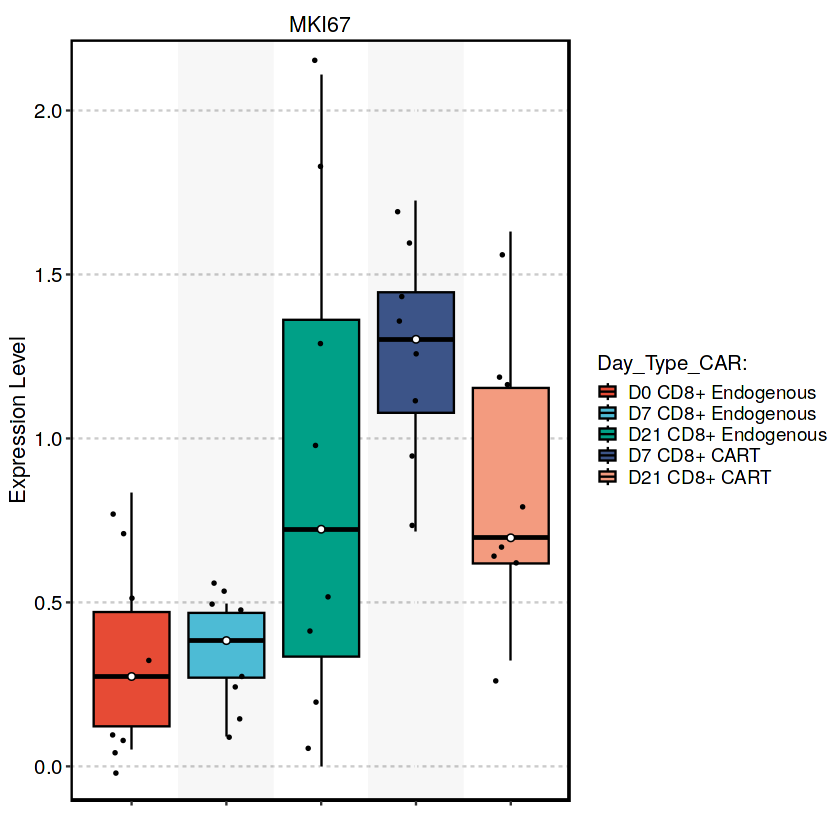

In [21]:
p

In [24]:
legend <- cowplot::get_legend(p) 
ggsave(paste0(panel.path, "/2D_legend.pdf"), legend, width=2, height=2)

Warning message:
"No shared levels found between `names(values)` of the manual scale and the
data's colour values."
Warning message in get_plot_component(plot, "guide-box"):
"Multiple components found; returning the first one. To return all, use `return_all = TRUE`."
